In [59]:
import os
import csv

os.chdir(r'C:\My\x2\180421\csv')
mypath = os.getcwd()
print(mypath)

infile_name = '180421_merged.csv'

C:\My\x2\180421\csv


In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv(infile_name, sep=',', header=0)

###### model - poly reg

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


dataset_X = df[['102 <1> (VDC)']].values / 24.9 * 1000 * 1.5 / 2
dataset_y = df[['101 <ITL900> (VDC)']].values / 24.97 * 1000


dataset_y_header = ['101 <ITL900> (VDC)']
dataset_X_header = [
    '102 <1> (VDC)'
    , '103 <2> (VDC)'
    , '104 <3> (VDC)'
    , '105 <4> (VDC)'
    , '106 <5> (VDC)'
    , '107 <6> (VDC)'
    , '108 <7> (VDC)'
    , '109 <8> (VDC)'
    , '110 <9> (VDC)'
    , '111 <10> (VDC)'
    , '112 <11> (VDC)'
    , '113 <12> (VDC)'
    , '114 <13> (VDC)'
    , '115 <14> (VDC)'
    , '116 <15> (VDC)'
    , '117 <16> (VDC)'
]

# merged all items
dataset_y = pd.concat([df[[dataset_y_header[0]]]]* len(dataset_X_header)).values / 24.97 * 1000
dataset_X = pd.concat([pd.DataFrame(df[[i]].values) for i in dataset_X_header]).values / 25 * 1000 * 1.5 / 2

In [111]:
list(dataset_y)

[array([-0.00428706]),
 array([-0.00426191]),
 array([-0.00419652]),
 array([-0.00428706]),
 array([-0.00431225]),
 array([-0.00432231]),
 array([-0.00437261]),
 array([-0.00434746]),
 array([-0.00434746]),
 array([-0.0043676]),
 array([-0.00433236]),
 array([-0.00433236]),
 array([-0.004433]),
 array([-0.00432231]),
 array([-0.00435751]),
 array([-0.0043676]),
 array([-0.0044028]),
 array([-0.00442295]),
 array([-0.00443805]),
 array([-0.00436256]),
 array([-0.00434746]),
 array([-0.0043827]),
 array([-0.00447325]),
 array([-0.00438771]),
 array([-0.00440785]),
 array([-0.00438771]),
 array([-0.00444305]),
 array([-0.00437765]),
 array([-0.0043978]),
 array([-0.004433]),
 array([6.75596676]),
 array([6.75561394]),
 array([6.7559163]),
 array([6.75581538]),
 array([6.75626912]),
 array([6.75672247]),
 array([6.75692431]),
 array([6.75682339]),
 array([6.75637004]),
 array([6.75596676]),
 array([6.75626912]),
 array([6.75682339]),
 array([6.75652103]),
 array([6.75697477]),
 array([6.75

In [137]:
training_set_X, test_set_X, training_set_y, test_set_y = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42, shuffle=False)

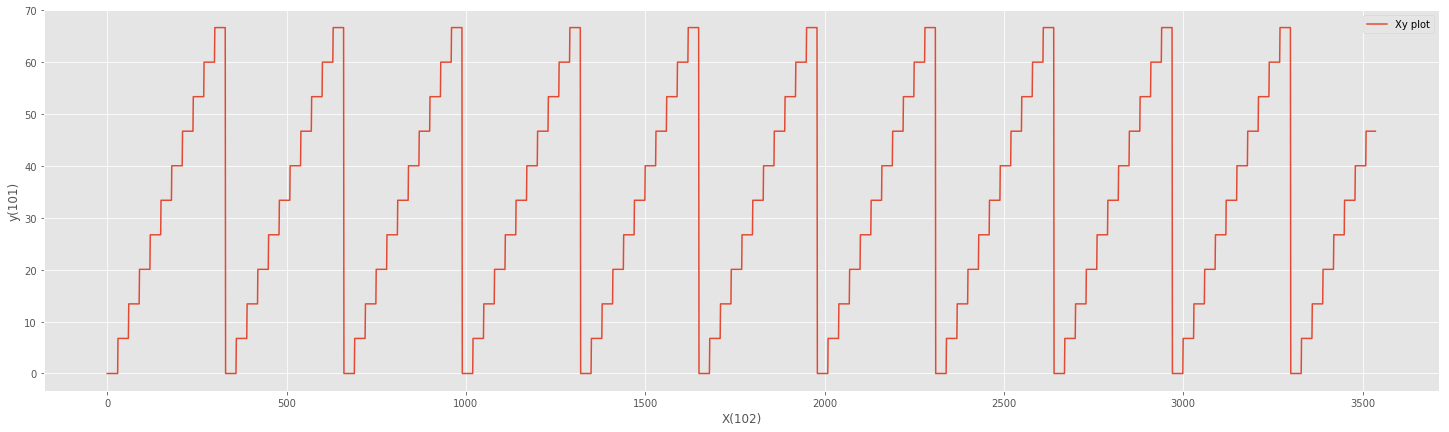

In [138]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt_x = range(len(training_set_X[:, 0]))
plt.plot(plt_x, (training_set_y), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2)
training_set_X_poly_reg = poly.fit_transform(training_set_X)
test_set_X_poly_reg = poly.fit_transform(test_set_X)

model_poly_reg = LinearRegression()
model_poly_reg.fit(training_set_X_poly_reg, training_set_y)
test_set_pred_poly_reg = model_poly_reg.predict(test_set_X_poly_reg)

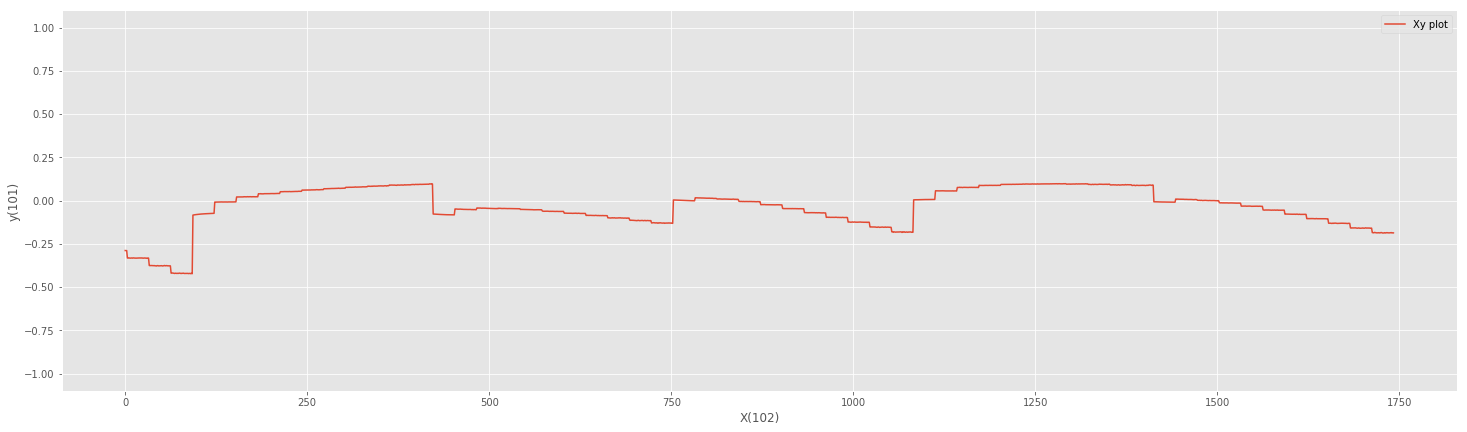

mse: 0.014247566933342042  abs max: 0.4230677720135674  abs avg: 0.087210929168974


In [140]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (25,7)
plt.ylim(ymax=1.1, ymin=-1.1)
plt_x = range(len(test_set_X[:, 0]))
plt.plot(plt_x, (test_set_y - test_set_pred_poly_reg), label='Xy plot')
plt.xlabel('X(102)')
plt.ylabel('y(101)')
plt.legend()
plt.show()


print('mse:', mean_squared_error(test_set_y, test_set_pred_poly_reg),
      ' abs max:', np.max(np.abs(test_set_y - test_set_pred_poly_reg)),
      ' abs avg:', np.average(np.abs(test_set_y - test_set_pred_poly_reg)))

- mse: 2.693522468176237e-06  abs max: 0.003981919999302086  abs avg: 0.0013822990458470194  // single item // poly3
- mse: 0.009377189466469095  abs max: 0.3749053306721635  abs avg: 0.07577623317994753   // all items // poly3

In [127]:
np.average(np.abs(test_set_y - test_set_pred_poly_reg))

0.07274389142853059

In [132]:
np.std(test_set_y - test_set_pred_poly_reg)

0.09276820040549501